In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [176]:
df = pd.read_csv('Pandas/data/311_Service_Requests_from_2010_to_Present.csv')

/Users/indranilgupta/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [177]:
df.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [179]:
df.shape

(300698, 53)

In [180]:
df.isnull().sum()/len(df)*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.719659
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.966757
Location Type                       0.043565
Incident Zip                        0.869643
Incident Address                   14.768971
Street Name                        14.768971
Cross Street 1                     16.388203
Cross Street 2                     16.554483
Intersection Street 1              85.414602
Intersection Street 2              85.579552
Address Type                        0.936155
City                                0.869311
Landmark                           99.883937
Facility Type                       0.721987
Status                              0.000000
Due Date                            0.000998
Resolution Description              0.000000
Resolution

In [181]:
#Dropping columns with more than 30% missing values:
df.drop(labels=['Intersection Street 1',
                     'Intersection Street 2',
                     'Landmark',
                     'Vehicle Type',
                     'School or Citywide Complaint', 
                     'Taxi Company Borough',
                     'Taxi Pick Up Location',
                     'Bridge Highway Name',
                     'Bridge Highway Direction',
                     'Road Ramp',
                     'Bridge Highway Segment',
                     'Garage Lot Name',
                     'Ferry Direction',
                     'Ferry Terminal Name',
                     ],axis=1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [182]:
#percentage of missing values greater than 5% and less than 30%: Replacing values with mode
df['Incident Address'].fillna(value=df['Incident Address'].mode()[0],inplace=True)
df['Street Name'].fillna(value=df['Street Name'].mode()[0],inplace=True)
df['Cross Street 1'].fillna(value=df['Cross Street 1'].mode()[0],inplace=True)
df['Cross Street 2'].fillna(value=df['Cross Street 2'].mode()[0],inplace=True)

In [183]:
#percentage of missing value in column is less than 5%, so dropping rows:
['Closed Date','Descriptor','Location Type','Incident Zip','Adddress Type','City','Facility Type','Due Date',
 'Resolution Action updated Date','X Coordinate (State Plane)','Y Coordinate (State Plane)','School Region',
 'School Code','School Zip','Latitude','Longitude','Location']

df1.dropna(axis=0,inplace=True)

In [184]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Created Date'] = pd.to_datetime(df['Created Date'])

In [185]:
d = df['Closed Date'] - df['Created Date']

In [186]:
df['seconds_to_solve'] = d.dt.seconds

In [187]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Created Date'] = pd.to_datetime(df['Created Date'])

In [188]:
df['hours_to_solve'] = df['seconds_to_solve'] / 3600

In [189]:
df['Agency Name'].unique()

array(['New York City Police Department', 'NYPD',
       'Internal Affairs Bureau'], dtype=object)

In [190]:
df['Agency Name'].value_counts()

New York City Police Department    300690
Internal Affairs Bureau                 6
NYPD                                    2
Name: Agency Name, dtype: int64

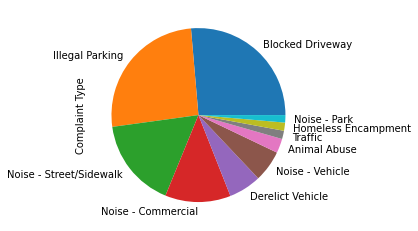

In [194]:
df['Complaint Type'].value_counts().head(10).plot(kind='pie')

In [195]:
df['Location Type'].value_counts()

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Park                               1
Terminal                           1
Ferry                              1
Name: Location Type, dtype: int64

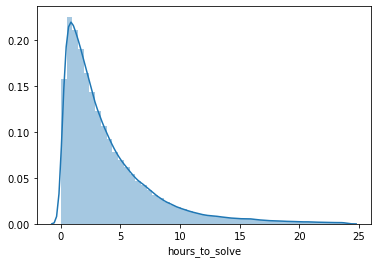

In [196]:
sns.distplot(df['hours_to_solve'])

In [197]:
df['hours_to_solve'].describe()

count    298534.000000
mean          3.929397
std           3.860323
min           0.000000
25%           1.266667
50%           2.688333
75%           5.266667
max          23.998611
Name: hours_to_solve, dtype: float64

**Major insights/patterns observed:**

- **Top 5 Complaints:** 

    . Blocked Driveway             
    . Illegal Parking              
    . Noise - Street/Sidewalk      
    . Noise - Commercial           
    . Derelict Vehicle    


- **Top 5 'Location type' having maximum service request Complaints:**

    . Street/Sidewalk             
    . Store/Commercial              
    . Club/Bar/Restaurant      
    . Residential Building/House           
    . Park/Playground  
    
    
- Out of the 3 Agencies, maximum complaints falls under the **New York City Police Department.**


- The overall average Request_Closing Time for service request complaints is **3.92 hrs.**


- All service request complaints are solved under 24hrs.

In [198]:
df_location_hours = df[['Location Type','hours_to_solve']]

In [199]:
df_location_hours.dropna(inplace=True)

<ipython-input-199-d7e526511a9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_location_hours.dropna(inplace=True)


In [200]:
df_hours_solve_location_type = df_location_hours.groupby(by='Location Type').mean()

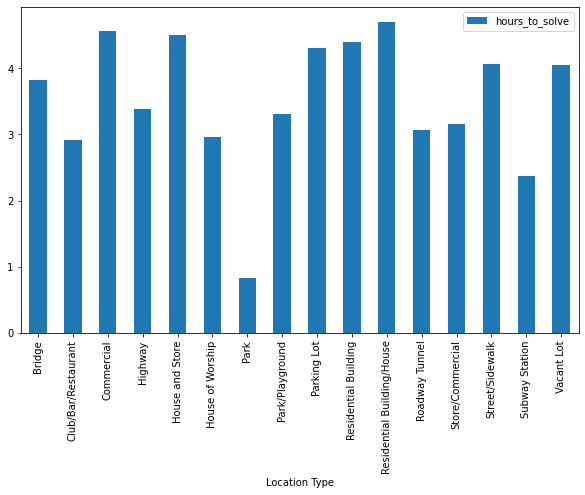

In [201]:
fig,ax = plt.subplots(figsize=(10,6))
df_hours_solve_location_type.plot(kind='bar',ax=ax)

In [212]:
df1 = df_hours_solve_location_type.reset_index()

In [213]:
df1.keys()

Index(['Location Type', 'hours_to_solve'], dtype='object')

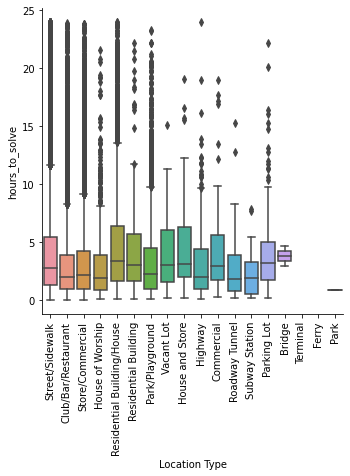

In [214]:
fig = sns.catplot(x='Location Type',y='hours_to_solve',kind='box',data=df)
fig.set_xticklabels(rotation=90)

**Hypothesis testing:**

H0: Average response time for street/sidewalk and Club/Bar/Restaurant is same 

**(mean of hours_to_Solve for street/sidewalk = mean of hours_to_Solve for Club/Bar/Restaurant)**

HA: Average response time for street/sidewalk and Club/Bar/Restaurant is not same

**(mean of hours_to_Solve for street/sidewalk $\not =$ mean of hours_to_Solve for Club/Bar/Restaurant)**

In [215]:
g1 = df1[['hours_to_solve','Location Type']].groupby(by='Location Type')
g1.mean()

,hours_to_solve
Location Type,
Bridge,3.819306
Club/Bar/Restaurant,2.917341
Commercial,4.568575
Highway,3.387288
House and Store,4.497133
House of Worship,2.964212
Park,0.834722
Park/Playground,3.300738
Parking Lot,4.309865


In [216]:
street_sidewalk = g1.get_group('Street/Sidewalk')
club_bar_restaurant = g1.get_group('Club/Bar/Restaurant')

In [217]:
m1 = street_sidewalk.mean()
s1 = street_sidewalk.std() # dof = n-1

m2= club_bar_restaurant.mean()
s2 = club_bar_restaurant.std()

print('Mean for Club/Bar/Restaurant {} \n Mean for Street/Sidewalk {}'.format(m2,m1))
print('Std for Club/Bar/Restaurant {} \n Std for Street/Sidewalk {}'.format(s2,s1))

Mean for Club/Bar/Restaurant hours_to_solve    2.917341
dtype: float64 
 Mean for Street/Sidewalk hours_to_solve    4.056351
dtype: float64
Std for Club/Bar/Restaurant hours_to_solve   NaN
dtype: float64 
 Std for Street/Sidewalk hours_to_solve   NaN
dtype: float64
